# TASK 1

In [2]:
import numpy as np
import torch
import math
import time

##  1.1
Implement a polynomial function polynomial_fun, that takes two input arguments, a weight vector 𝐰 of size 𝑀 + 1 and an input scalar variable 𝑥, and returns the function value 𝑦. The polynomial_fun should be vectorised for multiple pairs of scalar input and output, with the same 𝐰.
$$ y = \Sigma_{m=0}^M w_m x^m $$ 

Use polynomial_fun(M=4,w=[1,2,3,4,5].T) to generate a training set and a test set,in the form of respectively sampled 100 and 50 pairs of $x, \in [−20, 20]$, and $t$. The observed $t$ values are obtained by adding Gaussian noise (standard deviation being 0.2) to $y$. 

In [805]:
import random
def generate_data(w, train_size, x_range=[-20,20], std_dev=0.2): 
    """ 
    Generates data in the range of x_range. The data is generated by adding Gaussian noise to the output of the polynomial function.
    The observed values are obtained by adding Gaussian noise to the output of the polynomial function.
    """
    # x = torch.linspace(x_range[0], x_range[1], 100 + sample_size) # [x_1, x_2, ..., x_n]
    # y = polynomial_func(x, w) # [y_1, y_2, ..., y_n]
    # y += torch.normal(0, std_dev, y.shape) # [y_1 + noise_1, y_2 + noise_2, ..., y_n + noise_n]
    # return x, y
    
    x = torch.linspace(x_range[0], x_range[1], 100 + train_size) # [x_1, x_2, ..., x_n]
    t = polynomial_func(x, w) # [y_1, y_2, ..., y_n]
    t += torch.normal(0, std_dev, t.shape) # [y_1 + noise_1, y_2 + noise_2, ..., y_n + noise_n]
    
    idx = list(range(train_size + 100))
    random.shuffle(idx)

    t_train = t[idx[:train_size]]
    t_test = t[idx[train_size:]]
    x_train = x[idx[:train_size]]
    x_test = x[idx[train_size:]]
    
    return x_train, t_train, x_test, t_test


In [806]:
x_train, t_train, x_test, t_test = generate_data(torch.tensor(np.arange(1,6),dtype=torch.float32), train_size=100, x_range=[-20,20], std_dev=0.2)
t_test

tensor([3.6052e+05, 1.4154e+05, 7.7650e+04, 2.4338e+04, 5.7620e+04, 4.0740e+03,
        5.9827e+05, 7.0860e+05, 7.2211e+04, 1.7008e+01, 4.3663e+05, 6.2455e+05,
        1.4585e+04, 4.6563e+01, 2.2593e+05, 5.2559e-01, 6.5168e+05, 5.2419e+05,
        2.5189e+05, 2.2078e+04, 2.9494e+05, 1.4584e+04, 5.7283e+05, 6.2195e+04,
        1.2485e+05, 7.3841e+05, 4.9190e+04, 3.7867e+05, 2.5336e+03, 2.6758e+04,
        8.3391e+04, 4.7265e+03, 4.7212e+03, 7.9175e+02, 1.1024e+02, 4.5325e+04,
        2.0195e+05, 3.7958e+02, 1.5113e+02, 6.2243e+02, 3.4316e+05, 4.1708e+04,
        1.8001e+05, 1.0964e+05, 9.8443e+02, 6.2476e+03, 5.2439e+05, 3.9721e+05,
        4.1722e+04, 7.5638e+01, 2.9482e+05, 1.3303e+05, 5.4420e+03, 7.1618e+01,
        1.3056e+04, 2.1373e+05, 7.2240e+04, 2.4521e+00, 1.1448e+01, 3.7853e+05,
        1.2056e+03, 3.5128e+04, 6.5176e-01, 2.6557e+05, 1.8008e+05, 4.7680e+00,
        9.2193e+00, 1.8042e+04, 4.8654e+02, 1.2480e+05, 4.9173e+04, 2.0203e+05,
        1.0583e+02, 2.3864e+05, 1.1701e+

In [117]:
def generate_data(w, sample_size, x_range=[-20,20], std_dev=0.2): 
    """ 
    Generates data in the range of x_range. The data is generated by adding Gaussian noise to the output of the polynomial function.
    The observed values are obtained by adding Gaussian noise to the output of the polynomial function.
    """
    x = torch.linspace(x_range[0], x_range[1], sample_size) # [x_1, x_2, ..., x_n]
    y = polynomial_func(x, w) # [y_1, y_2, ..., y_n]
    y += torch.normal(0, std_dev, y.shape) # [y_1 + noise_1, y_2 + noise_2, ..., y_n + noise_n]
    return x, y

def polynomial_func(x, w):
    """Implements a polynomoial function that takes two input arguments, a weight vector w of size M + 1 
    and a scalar x. The function returns the value of the polynomial function at x. The polynomial function is vectorized for multiple pairs of scalar x and weight vector w.

    Args:
        w (torch array): Parameters of the polynomial function.
        x (scalar): Input data.

    Returns:
        np.ndarray: Output data.

    """
    powers = torch.arange(len(w)).to(x.dtype)  # [0, 1, ..., M]
    x_powers = torch.pow(x.unsqueeze(1), powers) # [x^0, x^1, ..., x^M] 
   
    return torch.matmul(x_powers, w) # w[0]x^1 + w[1]x^2 + ... + w[M]x^M


In [118]:
M = 4
w = torch.tensor([1, 2, 3, 4, 5], dtype=torch.float32)
x, y = generate_data(w, 100)
print(x.shape, y.shape)
x,y = generate_data(w, 50)
print(x.shape, y.shape)


torch.Size([100]) torch.Size([100])
torch.Size([50]) torch.Size([50])


# 1.2
Using the linear algebra modules in TensorFlow/PyTorch, implement a least square solver for fitting the polynomial functions, fit_polynomial_ls, which takes N pairs of $x$ and target values $t$ as input, with an additional input argument to specify the polynomial degree M, and returns the optimum weight vector $w$ in least-square sense, i.e. $$\ |\mathbf{x}|_2$$ is minimised. 

In [632]:
def fit_polynomial_ls(x, t, M):
    """ 
    Using linear least squares method to fit a polynomial function to the data.
    Takes M pairs of x and t and returns the optimal weight vector w.
    """
    powers = torch.arange(M).to(x.dtype) # [0, 1, ..., M]
    x_powers = torch.pow(x.unsqueeze(1), powers) # [x^0, x^1, ..., x^M]
    w = torch.matmul(torch.matmul(torch.inverse( torch.matmul(x_powers.t(), x_powers)) , x_powers.t()), t)
    
    return w
    

Use fit_polynomial_ls (M = 5) to compute the optimum weight vector $\mathbf{w}$ using the training set. In turn, compute the predicted target values $\hat{\mathbf{y}}$ $\forall x$ in both the training and test sets.  

a) Report,using printed messages,the mean(and standard deviation) in difference between the observed training data and the underlying “true” polynomial curve; and  

b) between the “LS-predicted” values and the underlying “true” polynomial curve. 

In [633]:
def print_report_least_squares(M, w=torch.tensor([1,2,3,4,5], dtype=torch.float32),sample_size = [50,100]):
    """ 
    Print the mean and the standard deviation in difference between the observed training data
    and the underlying true polynomial function for the least squares method.
    It also prints the difference between the predicted least squares values and the underlying true polynomial.
    """
    assert w.shape[0] == M, "The number of weights should be equal to the degree of the polynomial + 1"
    
    print('Least Squares Method')
    print('---------------------------------\n')

    for sample in sample_size:
        x, t = generate_data(w, sample)
        w_ls = fit_polynomial_ls(x, t, M)
     
        print("Sample size:", sample)
        print("--------------------------")
        print(f"Target range (t): [{round(torch.min(t).numpy().tolist(),3)}, {round(torch.max(t).numpy().tolist(),3)}]")
        print(f"mean: {round(torch.mean(t).numpy().tolist(),3)}, std: {round(torch.std(t).numpy().tolist(),3)}")
        print('---------------------------------')


        print("True weights: \t\t\t\t\t", w.numpy().tolist())
        print("Predicted weights: \t\t\t\t", [round(elem, 3) for elem in w_ls.detach().numpy().tolist()])
        print("Difference between true and predicted weights: ", [round(elem, 3) for elem in (w - w_ls).detach().numpy().tolist()])

        print("Mean difference between true and predicted weights: \t\t\t", round(torch.mean(w - w_ls).detach().numpy().tolist(), 4))
        print("Standard deviation of difference between true and predicted weights: \t", round(torch.std(w - w_ls).detach().numpy().tolist(),4))
        print("Difference between true and predicted values: \t\t\t\t", round(torch.mean(torch.abs(polynomial_func(x, w) - polynomial_func(x, w_ls))).detach().numpy().tolist(),4) )
        print("Standard deviation of difference between true and predicted values: \t", round(torch.std(torch.abs(polynomial_func(x, w) - polynomial_func(x, w_ls))).detach().numpy().tolist(),4))
        print("--------------------------\n")


In [634]:
print_report_least_squares(M= 5, w= torch.tensor(np.arange(1,6),dtype=torch.float32))

Least Squares Method
---------------------------------

Sample size: 50
--------------------------
Target range (t): [0.664, 833241.125]
mean: 173652.625, std: 233657.938
---------------------------------
True weights: 					 [1.0, 2.0, 3.0, 4.0, 5.0]
Predicted weights: 				 [1.278, 1.986, 2.994, 4.0, 5.0]
Difference between true and predicted weights:  [-0.278, 0.014, 0.006, -0.0, -0.0]
Mean difference between true and predicted weights: 			 -0.0515
Standard deviation of difference between true and predicted weights: 	 0.1267
Difference between true and predicted values: 				 0.3117
Standard deviation of difference between true and predicted values: 	 0.3815
--------------------------

Sample size: 100
--------------------------
Target range (t): [0.78, 833241.062]
mean: 166916.828, std: 223739.297
---------------------------------
True weights: 					 [1.0, 2.0, 3.0, 4.0, 5.0]
Predicted weights: 				 [0.569, 2.008, 3.009, 4.0, 5.0]
Difference between true and predicted weights:  [0.431

# 1.3
Using relevant functions/modules in TensorFlow/PyTorch, implement a stochastic minibatch gradient descent algorithm for fitting the polynomial functions, fit_polynomial_sgd, which has the same input arguments as fit_polynomial_ls does, with additional two input arguments, learning rate and minibatch size. This function also returns the optimum weight vector $\hat{\mathbf{w}}$. During training, the function should report the loss periodically using printed messages.

In [635]:
import matplotlib.pyplot as plt

In [743]:
def fit_polynomial_sgd(x, t, M, lr, batch_size):
    """ 
    Runs a stochastic gradient descent for fitting polynomial functions with the 
    same arguments as fit_polynomial_ls in addition to the learning rate and the batch size.
    """
    w = torch.randn(M, requires_grad=True)
    #w = torch.tensor(torch.randn(M).clone().detach(), requires_grad=True) 
    optimizer = torch.optim.SGD([w], lr=lr)

    n_batches = len(x) // batch_size
    losses = []
    for _ in range(1000):
        permutation = torch.randperm(len(x))
        for i in range(n_batches):
            indices = permutation[i*batch_size:(i+1)*batch_size]
            t_batch = t[indices]
            x_batch = x[indices]
            optimizer.zero_grad()
            loss = torch.mean(torch.square(polynomial_func(x_batch, w) - t_batch))
            loss.backward()
            losses.append(loss.item())
            optimizer.step()
    
    # plt.plot(polynomial_func(x, w).detach().numpy(), label="Predicted")
    # plt.plot(t.numpy(), label='actual')
    plt.plot(losses, label="Loss")
    # plt.legend()
    plt.show()
    
    return w

* Report,usingprinted messages,the mean( and standard deviation) in difference between the “SGD-predicted” values and the underlying “true” polynomial curve.
* Compare the accuracy of your implementation using the two methods with ground-truth on test set and report the root-mean-square-errors (RMSEs) in both $\mathbf{w}$ and $\mathbf{y}$ using printed messages. 

In [744]:
def print_report_sgd(M, lr, batch_size, w=torch.tensor([1,2,3,4,5], dtype=torch.float32),sample_size = [50,100]):
    """ 
    Print the mean and the standard deviation in difference between the observed training data
    and the underlying true polynomial function for the stochastic gradient descent method.
    It also prints the difference between the predicted sgd values and the underlying true polynomial.
    """
    

    print("Hyperparameter Settings (SGD METHOD):\n")
    print("Learning rate:", lr)
    print("Batch size:", batch_size)
    print("--------------------------------------------------------------------------------\n")
    for sample in sample_size:
        x, t = generate_data(w, sample)
        print("Sample size:", sample)
        print("--------------------------------------------------------------------------------")
        print(f"Target range (t): [{round(torch.min(t).numpy().tolist(),3)}, {round(torch.max(t).numpy().tolist(),3)}]")
        print(f"mean: {round(torch.mean(t).numpy().tolist(),3)}, std: {round(torch.std(t).numpy().tolist(),3)}")
        print('--------------------------------------------------------------------------------')

        w_sgd = fit_polynomial_sgd(x, t, M, lr, batch_size)

        print("True weights: \t\t\t\t\t", w.numpy().tolist())
        print("Predicted weights: \t\t\t\t", [round(elem, 3) for elem in w_sgd.detach().numpy().tolist()])
        print("Difference between true and predicted weights: ", [round(elem, 3) for elem in (w - w_sgd).detach().numpy().tolist()])

        print("Mean difference between true and predicted weights: \t\t\t", round(torch.mean(w - w_sgd).detach().numpy().tolist(), 4))
        print("Standard deviation of difference between true and predicted weights: \t", round(torch.std(w - w_sgd).detach().numpy().tolist(),4))
        print("Difference between true and predicted values: \t\t\t\t", round(torch.mean(torch.abs(polynomial_func(x, w) - polynomial_func(x, w_sgd))).detach().numpy().tolist(),4) )
        print("Standard deviation of difference between true and predicted values: \t", round(torch.std(torch.abs(polynomial_func(x, w) - polynomial_func(x, w_sgd))).detach().numpy().tolist(),4))
        print("--------------------------------------------------------------------------------\n")


Hyperparameter Settings (SGD METHOD):

Learning rate: 2.377e-10
Batch size: 10
--------------------------------------------------------------------------------

Sample size: 50
--------------------------------------------------------------------------------
Target range (t): [0.458, 833241.062]
mean: 173652.594, std: 233657.891
--------------------------------------------------------------------------------


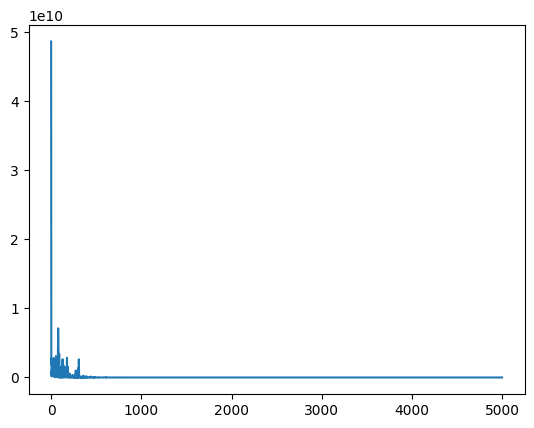

True weights: 					 [1.0, 2.0, 3.0, 4.0, 5.0]
Predicted weights: 				 [-1.317, 0.019, -0.094, 4.004, 5.009]
Difference between true and predicted weights:  [2.317, 1.981, 3.094, -0.004, -0.009]
Mean difference between true and predicted weights: 			 1.4759
Standard deviation of difference between true and predicted weights: 	 1.412
Difference between true and predicted values: 				 145.9153
Standard deviation of difference between true and predicted values: 	 96.7797
--------------------------------------------------------------------------------

Sample size: 100
--------------------------------------------------------------------------------
Target range (t): [0.551, 833240.875]
mean: 166916.844, std: 223739.312
--------------------------------------------------------------------------------


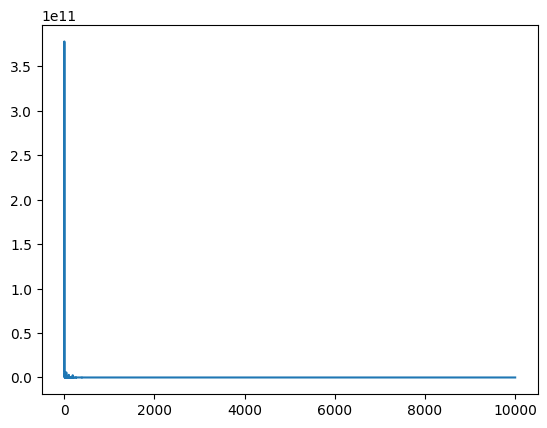

True weights: 					 [1.0, 2.0, 3.0, 4.0, 5.0]
Predicted weights: 				 [-0.3, 0.433, 0.026, 4.002, 5.007]
Difference between true and predicted weights:  [1.3, 1.567, 2.974, -0.002, -0.007]
Mean difference between true and predicted weights: 			 1.1665
Standard deviation of difference between true and predicted weights: 	 1.2437
Difference between true and predicted values: 				 183.3046
Standard deviation of difference between true and predicted values: 	 116.0483
--------------------------------------------------------------------------------



In [745]:
print_report_sgd(M=5, lr=2.377e-10, batch_size=10, w=torch.tensor(np.arange(1,6), dtype=torch.float32),sample_size = [50,100])

4.  Compare the speed of the two methods and report time spent in fitting/training (in seconds) using printed messages.
* Implement a task script “task1a.py”, under folder “task1”. 



In [746]:
def compare_speed(M, w=torch.tensor([1,2,3,4,5], dtype=torch.float32), sample_size = [50,100]):
    """ 
    Compare the speed of the least squares method and the stochastic gradient descent method.
    """
    print("Comparison of speed between the least squares method and the stochastic gradient descent method:\n")
    print("--------------------------------------------------------------------------------\n")
    for sample in sample_size:
        x, t = generate_data(w, sample)
        print("Sample size:", sample)
        print("--------------------------------------------------------------------------------")

        start = time.time()
        w_ls = fit_polynomial_ls(x, t, M)
        end = time.time()
        print("Least Squares Method: ", end - start, "seconds")

        start = time.time()
        w_sgd = fit_polynomial_sgd(x, t, M, lr=2.377e-10, batch_size=10)
        end = time.time()
        print("Stochastic Gradient Descent Method: ", end - start, "seconds")
        print("--------------------------------------------------------------------------------\n")

Comparison of speed between the least squares method and the stochastic gradient descent method:

--------------------------------------------------------------------------------

Sample size: 50
--------------------------------------------------------------------------------
Least Squares Method:  0.020817995071411133 seconds


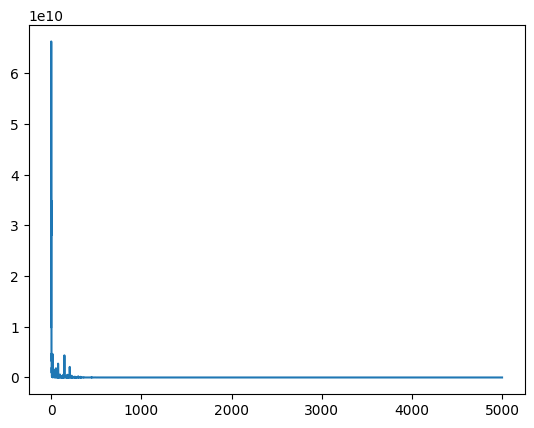

Stochastic Gradient Descent Method:  0.800684928894043 seconds
--------------------------------------------------------------------------------

Sample size: 100
--------------------------------------------------------------------------------
Least Squares Method:  0.0001678466796875 seconds


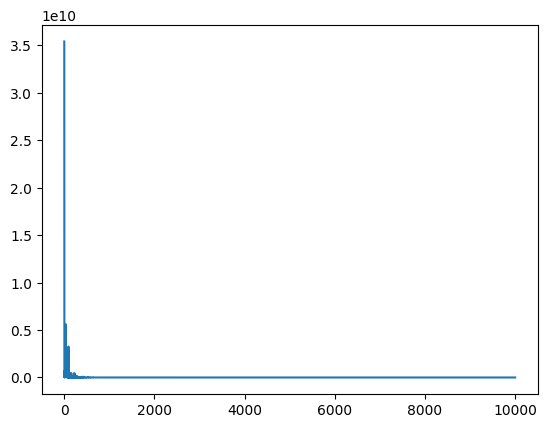

Stochastic Gradient Descent Method:  1.5072970390319824 seconds
--------------------------------------------------------------------------------



In [747]:
compare_speed(M=5, w=torch.tensor(np.arange(1,6), dtype=torch.float32), sample_size = [50,100])

5. Experiment how to make M a learnable model parameter and using SGD to optimise this more
flexible model.  

In [748]:
def learn_M(M_range, lrs, batch_size):
    """ 
    Returns the M that minimizes the loss for the stochastic gradient descent method.
    """
    losses = []
    best_loss = np.inf
    best_M = np.inf
    best_lr = np.inf
    for M, lr in zip(M_range,lrs):
        x, t = generate_data(torch.tensor([i for i in range(1, M+1)], dtype=torch.float32), 100)
        w = fit_polynomial_sgd(x, t, M, lr, batch_size)
        loss = torch.mean(torch.square(polynomial_func(x, w) - t))
        losses.append(loss.item())
        if loss < best_loss:
            best_loss = loss
            best_M = M
            best_lr = lr
    print(losses)
    return best_M, best_lr, best_loss

In [789]:
lr_schedule = [0.02 * (0.5 ** (i//5)) if i < 5 else 2e-10 * (0.5 ** (i-4)) for i in range(10)]
lr_schedule
lr_schedule = [2e-2, 1e-3, 2e-5, 2e-8, 2e-10, 2e-18, 2e-22, 2e-24, 2e-26, 2e-28]

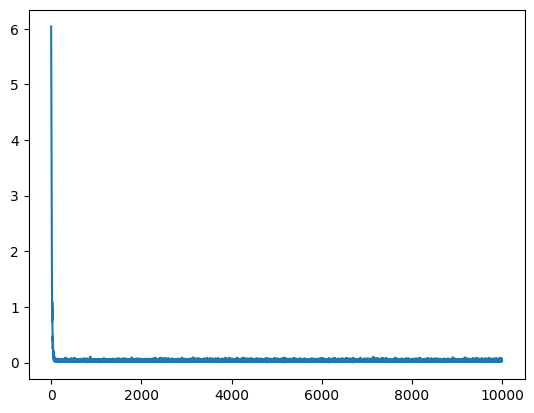

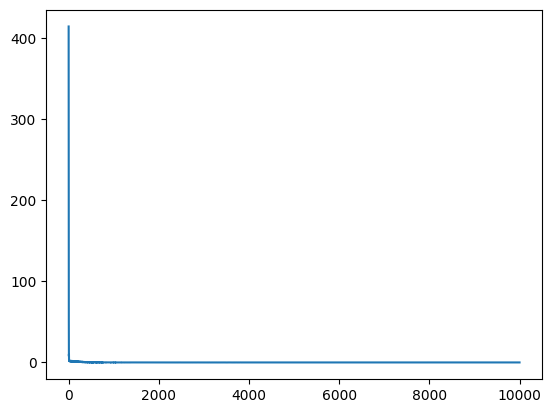

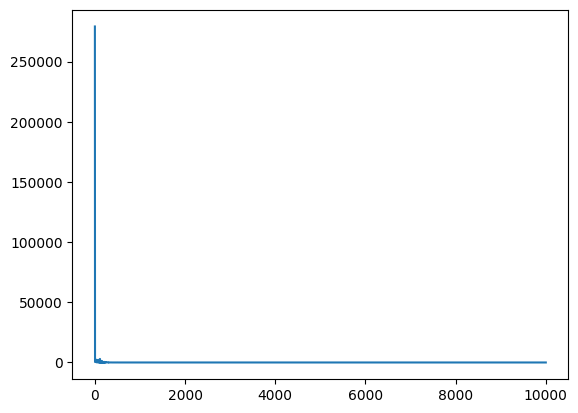

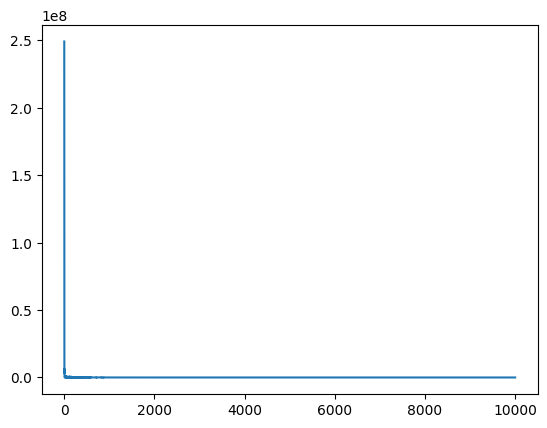

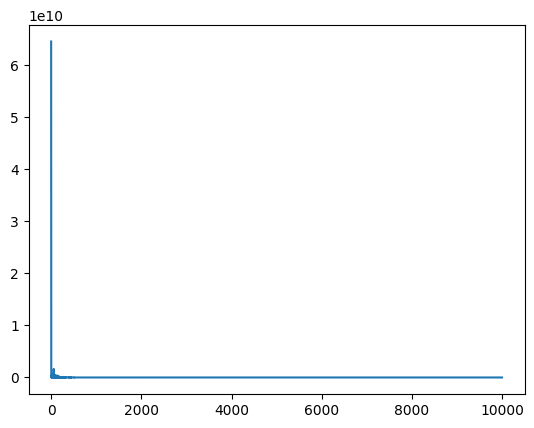

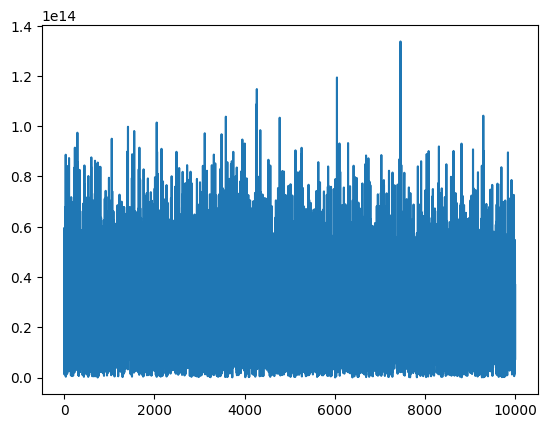

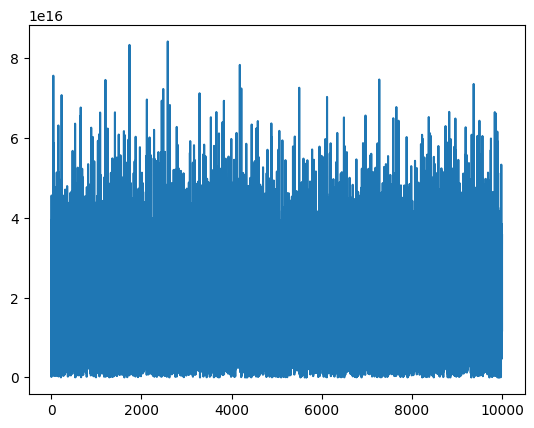

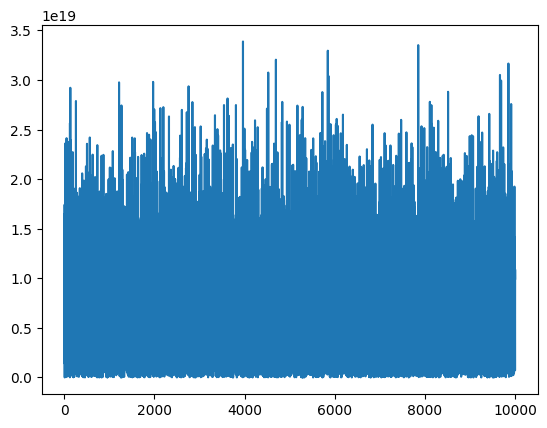

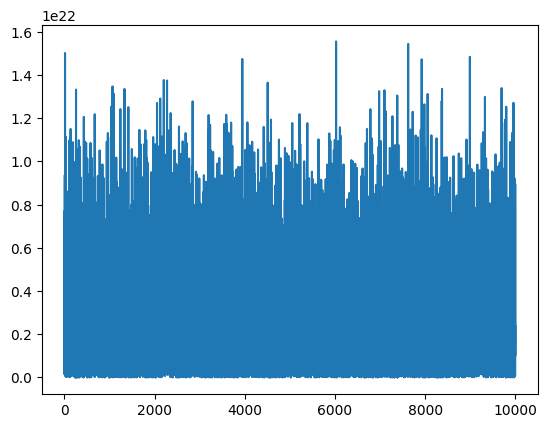

[0.03664953634142876, 0.03677666559815407, 0.04439949989318848, 134.667724609375, 214481.6875, 27170036514816.0, 1.901734424005837e+16, 7.178510756877435e+18, 3.0914878014341524e+21]


(1, 0.03664953634142876)

In [790]:
learn_M(M_range=[i for i in range(1,10)],lrs=lr_schedule, batch_size=10)

In [736]:
def print_learnead_M(M_range, lrs, batch_size):
    """ 
    Print the M that minimizes the loss for the stochastic gradient descent method.
    """
    print("M that minimizes the loss for the stochastic gradient descent method:\n")
    print("--------------------------------------------------------------------------------\n")
    print("Learning rates:", lrs)
    print("Batch size:", batch_size)
    print("--------------------------------------------------------------------------------\n")
    print("M:", learn_M(M_range, lrs, batch_size))
    print("--------------------------------------------------------------------------------\n")

In [737]:
print_learnead_M(M_range=[i for i in range(1,10)],lrs=lr_schedule, batch_size=10)

M that minimizes the loss for the stochastic gradient descent method:

--------------------------------------------------------------------------------

Learning rates: [0.02, 0.001, 2e-08, 2e-09, 2e-10, 2e-12, 2e-25, 2e-30, 2e-40, 2e-50]
Batch size: 10
--------------------------------------------------------------------------------

[0.04288727417588234, 0.04594622179865837, 132.05853271484375, 13477.8271484375, 20896.837890625, nan, 1.959146110844928e+16, 1.0048727037314597e+19, 3.184705276846304e+21]
M: (1, 0.04288727417588234)
--------------------------------------------------------------------------------



6. Report,using printed messages,the optimised M value and the mean ( and standard deviation) in difference between the model-predicted values and the underlying “true” polynomial curve.

In [792]:
def report_M(M_range, lrs, batch_size, w=torch.tensor([1,2,3,4,5], dtype=torch.float32), sample_size = [50,100]):
    """ 
    Print the mean and the standard deviation in difference between the observed training data
    and the underlying true polynomial function for the stochastic gradient descent method.
    It also prints the difference between the predicted sgd values and the underlying true polynomial.
    """
    print("--------------------------------------------------------------------------------\n")
    print("M that minimizes the loss for the stochastic gradient descent method:\n")
    print("--------------------------------------------------------------------------------\n")
    print("Learning rates:", lrs)
    print("Batch size:", batch_size)
    print("--------------------------------------------------------------------------------\n")
    for sample in sample_size:
        x, t = generate_data(w, sample)
        print("Sample size:", sample)
        print("--------------------------------------------------------------------------------")
        print(f"Target range (t): [{round(torch.min(t).numpy().tolist(),3)}, {round(torch.max(t).numpy().tolist(),3)}]")
        print(f"mean: {round(torch.mean(t).numpy().tolist(),3)}, std: {round(torch.std(t).numpy().tolist(),3)}")
        print('--------------------------------------------------------------------------------')

        M, lr, loss = learn_M(M_range, lrs, batch_size)
        print("M:", M)
        print("Learning rate:", lr)
        print("Loss:", loss)
        print("--------------------------------------------------------------------------------\n")

# TASK 2

In [810]:
from torchvision import models

ImportError: cannot import name 'PILLOW_VERSION' from 'PIL' (/Users/eirikbaekkelund/opt/anaconda3/envs/applied-ml/lib/python3.10/site-packages/PIL/__init__.py)

In [ ]:
res_net = torchvision